# Submodule #4: Analyze Phylogenetic Tree

### Primary Objective
This module will teach you how to analyze and interpret phylogenetic trees to uncover evolutionary insights. You'll learn to:
1. Visualize trees and understand what they reveal about relationships between species or genes.
2. Use tools like BLAST to compare sequences and link them to tree data.
3. Apply ancestral state reconstruction to predict traits or genes in common ancestors.

### Overview
- **What You'll Learn:**
1. Visualize and interpret phylogenetic trees using IQ-TREE (a tree-building and visualization tool) and iTOL (a customizable online tree viewer).
Example: Understand how bird species in different regions evolved from a common ancestor.
2. Conduct comparative metagenomics using BLAST and Biopython to identify functional relationships.
Example: Compare sequences of antibiotic-resistant bacteria to study the spread of resistance genes.
3. Perform ancestral state reconstruction using BEAST, a Bayesian inference tool.
Example: Reconstruct the genetic traits of the last common ancestor of mammals.


- **Tools and Libraries:**
  - **IQ-TREE and iTOL**: For creating and visualizing phylogenetic trees.
  - **BLAST**: To compare sequences with databases and identify similarities.
  - **BEAST**: For reconstructing ancestral states using Bayesian statistical methods.


- **Why It Matters:**

- **Revealing Evolutionary Relationships**:
Phylogenetic trees help us see how species, genes, or traits are connected through evolution.
Real-world Example: During the COVID-19 pandemic, phylogenetic trees were used to track the evolution of new variants of the virus.
- **Deeper Biological Insights**:
Comparative analysis and ancestral reconstruction provide a better understanding of functional relationships and evolutionary trends.
Real-world Example: Reconstructing the ancestral traits of dinosaurs helped scientists understand the origins of feathers in birds.

This introduction prepares students for the practical tasks in the module while highlighting the significance of each concept with relatable examples. Let me know if you'd like adjustments or further elaboration!

## Learning Objectives
In Submodule 4, we will build upon the phylogenetic trees constructed in Submodule 3 to analyze and interpret their significance. This includes:

#### 1. **Comparative Metagenomics from the Tree:**

Linking tree branches or nodes to functional genes or sequences to uncover relationships.
Example: Identify genes responsible for drug resistance in bacterial species and how they are distributed across evolutionary branches.
#### 2.**Ancestral Tree Reconstruction Using Advanced Tools:**

Reconstruct traits or genetic sequences of common ancestors using statistical methods.
Example: Determine when certain traits, like antibiotic resistance or venom production, first appeared in evolutionary history.

#### ***By the End of This Submodule, You Will Be Able To:***
#### 1.**Interpret and Visually Represent Phylogenetic Trees:**

Understand the structure of phylogenetic trees, including branch lengths, bootstrap values, and evolutionary relationships.
Example: Explain how two species, like humans and chimpanzees, share a common ancestor and how they diverged over time.
#### 2.**Conduct Comparative Metagenomics Analysis:**

Use BLAST and Biopython to compare sequences and extract meaningful biological insights.
Example: Study how genes associated with photosynthesis are conserved across plants and cyanobacteria.
#### 3.**Gain Insights into Ancestral State Reconstruction:**

Apply Bayesian inference to predict traits or sequences of ancestral nodes.
Example: Reconstruct the genetic sequences of early mammals to identify traits shared with modern species.

This version is designed to give students a clear understanding of what they will achieve by the end of the submodule, while connecting the learning objectives to real-world applications. Let me know if further clarification or edits are needed!

----------------------------------------------------------------------------------------------------------------
# Training Plan 

Submodule #1: Understanding the Basics of Phylogenetic

Submodule #2: Collect and Prepare Sequence Data and Analysis

Submodule #3: Construct Phylogenetic Tree

 
<font color="green"> **Submodule #4: Analyze Phylogenetic Tree** </font>

## 4.1 Interpret and Visually Represent Phylogenetic Trees

### Overview
Visualizing phylogenetic trees is crucial for interpreting evolutionary relationships and presenting findings effectively. In this section, we will:

- Learn to construct and visualize phylogenetic trees using IQ-TREE.
- Explore iTOL (Interactive Tree of Life) as an alternative for more customized visualizations.


### Why IQ-TREE?
IQ-TREE is a powerful tool that combines multiple features for phylogenetic analysis and visualization, making it a favorite among researchers.
#### Key Features of IQ-TREE:
1. **Phylogenetic Analysis:**
- Supports model testing to select the best evolutionary model for your data.
- Offers bootstrapping and Approximate Likelihood Ratio Tests (aLRT) for assessing the reliability of tree branches.
2. **Tree Visualization:**
- Provides built-in capabilities to explore trees and understand relationships.

**Real-world Example:**
Scientists studying COVID-19 variants used IQ-TREE to build phylogenetic trees. These trees helped track mutations and identify how the virus spread globally.

### Steps to Use IQ-TREE
#### 1. Running IQ-TREE to Visualize Trees:
The following command constructs and visualizes a phylogenetic tree:

In [42]:
import subprocess

subprocess.run(["iqtree", "-s", "./data/cov/alignment/aligned_Coronavirus-Orf9-NCBI.fasta", "-m", "TEST", "-bb", "1000", "-alrt", "1000", "-nt", "AUTO","-pre", "./data/cov/visualization/aligned_Coronavirus-Orf9-NCBI"])

Checkpoint (./data/cov/visualization/aligned_Coronavirus-Orf9-NCBI.ckp.gz) indicates that a previous run successfully finished
Use `-redo` option if you really want to redo the analysis and overwrite all output files.
Use `--redo-tree` option if you want to restore ModelFinder and only redo tree search.
Use `--undo` option if you want to continue previous run when changing/adding options.


CompletedProcess(args=['iqtree', '-s', './data/cov/alignment/aligned_Coronavirus-Orf9-NCBI.fasta', '-m', 'TEST', '-bb', '1000', '-alrt', '1000', '-nt', 'AUTO', '-pre', './data/cov/visualization/aligned_Coronavirus-Orf9-NCBI'], returncode=2)

#### Options Explained:
- -s: Specifies the input file.
- -m TEST: Automatically selects the best substitution model.
- -bb 1000: Runs bootstrap analysis for statistical support.
- -alrt 1000: Performs approximate likelihood ratio testing.
- -nt AUTO: Automatically determines the number of threads.

#### 2. Visualize the Tree in Python:
The output tree `(aligned_sequences_subset.treefile)` can be visualized using `Bio.Phylo` and Matplotlib:

Tree image successfully saved at: ./data/cov/visualization/visualization_phylogenetic_tree_output_aligned_Coronavirus-Orf9-NCBI.png


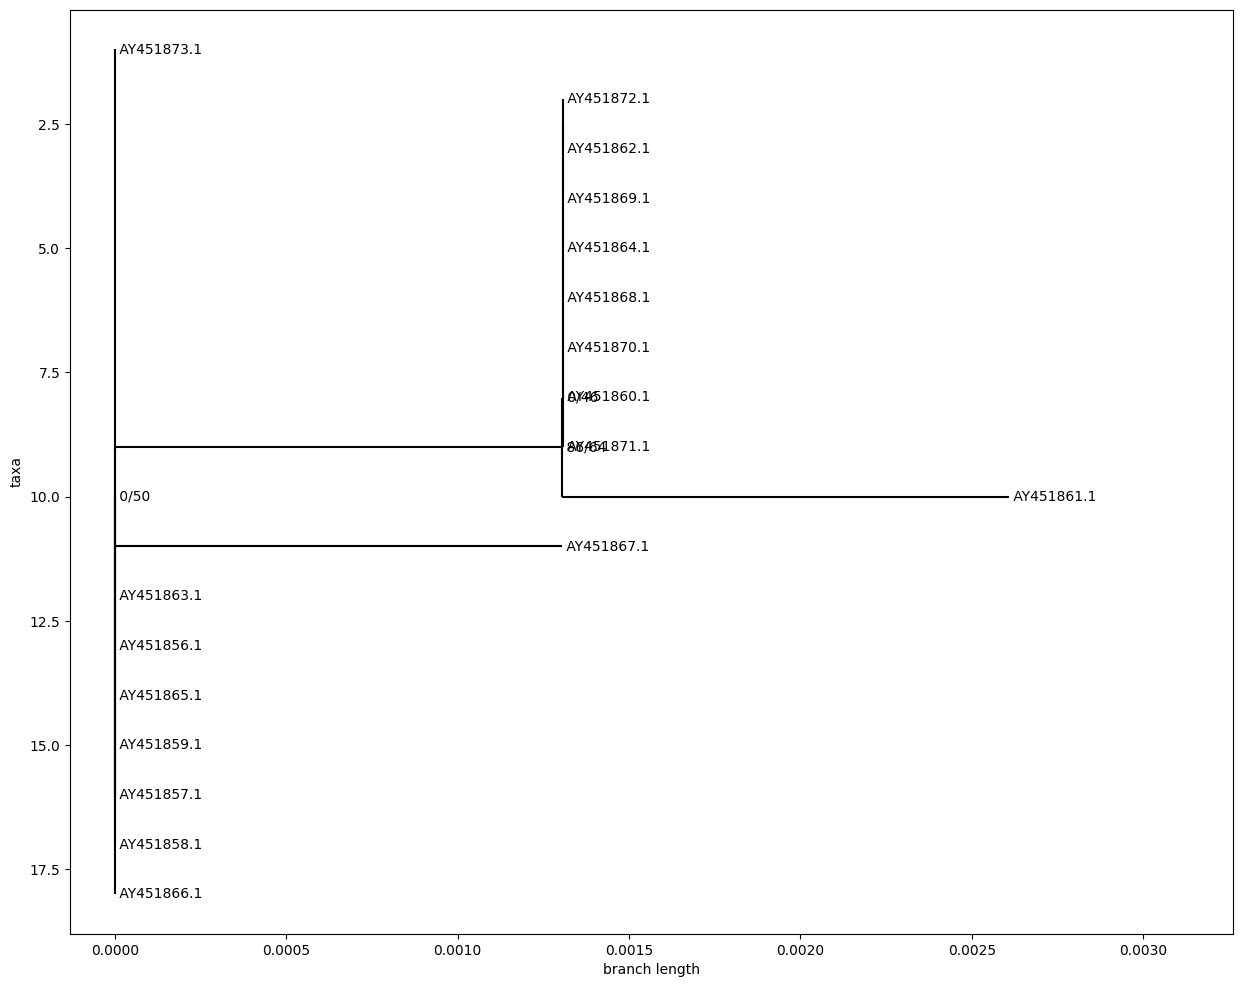

In [43]:
from Bio import Phylo
import matplotlib.pyplot as plt

treefile = "./data/cov/visualization/aligned_Coronavirus-Orf9-NCBI.treefile"

output_path = "./data/cov/visualization/visualization_phylogenetic_tree_output_aligned_Coronavirus-Orf9-NCBI.png"

tree = Phylo.read(treefile, "newick")

fig, ax = plt.subplots(figsize=(15, 12))  # Create figure and axes

Phylo.draw(tree, do_show=False, axes=ax)

fig.savefig(output_path, dpi=300, bbox_inches='tight')

print(f"Tree image successfully saved at: {output_path}")

plt.show()

### Explanation of the Tree
The tree generated by IQ-TREE represents evolutionary relationships, with branch lengths corresponding to genetic divergence. Users can interpret the topology to understand lineage splits and evolutionary distances.

For customization, users may optionally use iTOL (Interactive Tree of Life), which offers publication-quality visualizations.

#### 3. Using iTOL (Interactive Tree of Life):
1. Visit the iTOL website.
2. Upload your `phylogenetic_tree_output_aligned_sequences_subset.nwk` file.
3. Customize the tree by adding labels, colors, and annotations.

<div style="padding: 10px; border: 1px solid #b3e5fc; border-radius: 5px; background-color: #e1f5fe;">
    <strong>Tip:</strong>💡 Use iTOL for publication-quality visualizations and advanced customization options.
</div>

### 4.2 Importance of Visual Representation
Visual representation is critical for:

1. **Interpreting Results:** Simplifies understanding of evolutionary relationships.
2. **Communication:** Makes findings accessible to a broader audience.
3. **Highlighting Features:** Emphasizes key evolutionary events and patterns.

<div style="padding: 10px; border: 1px solid #b3e5fc; border-radius: 5px; background-color: #e1f5fe;">
    <strong>Note:</strong> 📝  A well-designed visualization can make complex evolutionary relationships easier to comprehend.
</div>

## 4.3 Conduct Comparative Metagenomics Along Different Branches

### Overview
Comparative metagenomics involves analyzing genetic content along different branches of a phylogenetic tree. By mapping genetic sequences to branches of the tree, researchers can uncover patterns of variation and evolution across species or strains. This method provides critical insights into how genetic features are distributed and how they have evolved in different lineages.

For instance, variations in genes between closely related species might indicate adaptations to specific environmental pressures or unique evolutionary events. Comparative metagenomics can also help identify conserved genetic elements or functions, highlighting essential genes shared across lineages.

### Steps for Comparative Metagenomics

#### 1. BLAST:
BLAST (Basic Local Alignment Search Tool) is a powerful tool for comparing biological sequences, such as DNA or protein sequences. It identifies regions of similarity, helping to link sequences from different species to a common ancestor or highlight differences that have emerged over time.

Using BLAST in comparative metagenomics allows you to:
- Compare query sequences against a reference database.
- Identify homologous sequences, which are indicative of shared ancestry.
- Detect unique sequences that might explain species-specific traits or adaptations.

#### Example Use Case:
Suppose you have a set of genetic sequences from species represented in a phylogenetic tree. Using BLAST:
1. You can create a database from the sequences.
2. Compare a query sequence (e.g., a gene of interest) to identify its presence and variation across the branches of the tree.
3. Analyze the results to determine patterns of conservation or divergence.

The outputs of BLAST (alignment scores, e-values, etc.) can then be visualized and interpreted in the context of the phylogenetic tree to draw meaningful biological conclusions.


##### **1. Create a BLAST Database**
Navigate to your data directory and create a database:

In [44]:
!makeblastdb -in ./data/cov/sequence/Coronavirus-Orf9-NCBI.fasta -dbtype nucl -out ./data/cov/analysis_result/seq_database



Building a new DB, current time: 12/18/2024 13:46:12
New DB name:   /home/sagemaker-user/nosi-phylogenetic-tree/data/cov/analysis_result/seq_database
New DB title:  ./data/cov/sequence/Coronavirus-Orf9-NCBI.fasta
Sequence type: Nucleotide
Deleted existing Nucleotide BLAST database named /home/sagemaker-user/nosi-phylogenetic-tree/data/cov/analysis_result/seq_database
Keep MBits: T
Maximum file size: 3000000000B
Adding sequences from FASTA; added 18 sequences in 0.0011549 seconds.




#### 2. Run BLAST for Comparisons:
Create a `query_seq.fasta` file with sequences to compare.
Run BLAST to compare query sequences against the database:

In [45]:
!blastn -query ./data/cov/sequence/query_seq.fasta -db ./data/cov/analysis_result/seq_database -out ./data/cov/analysis_result/analysis_result_phylogenetic_tree_output_aligned_Coronavirus-Orf9-NCBI.txt -outfmt 6

#### 3. View Results:
Results are saved in `analysis_result_phylogenetic_tree_output_aligned_sequences_subset.txt.`

<div style="padding: 10px; border: 1px solid #ffccbc; border-radius: 5px; background-color: #ffebee;">
    <strong>Alert:</strong>⚠️ Ensure your sequences are properly formatted and validated before running BLAST to avoid errors.
</div>

## 4.4 Automate Comparative Metagenomics Analysis using Biopython

### Overview
Automation can streamline comparative metagenomics analysis, making it more efficient and reproducible. Manual processing of sequences, especially when dealing with large datasets, can be time-consuming and error-prone. By automating tasks such as BLAST searches, data parsing, and result visualization, researchers can focus more on interpretation and biological insights.

### How Biopython Helps
Biopython is a robust library for biological computation in Python. It provides tools to:
- Automate sequence alignments and BLAST queries.
- Parse BLAST results to extract meaningful information programmatically.
- Handle large datasets efficiently, reducing manual overhead.

### Script for Automation
Below is a general outline of how a Biopython script can be structured to automate comparative metagenomics:

In [47]:
#Setup and Import Libraries
from Bio.Blast import NCBIWWW, NCBIXML

# Function to run BLAST and parse results
def run_blast(query_file, db_file, output_file):
    result_handle = NCBIWWW.qblast("blastn", db_file, query_file)
    with open(output_file, "w") as out_handle:
        out_handle.write(result_handle.read())
    result_handle.close()

# Run the BLAST
run_blast("./data/cov/sequence/query_seq.fasta", "./data/cov/analysis_result/seq_database", "./data/cov/analysis_result/blast_analysis_result_phylogenetic_tree_output_aligned_Coronavirus-Orf9-NCBI.xml")

# Parse the BLAST results
with open("./data/cov/analysis_result/blast_analysis_result_phylogenetic_tree_output_aligned_Coronavirus-Orf9-NCBI.xml") as result_handle:
    blast_records = NCBIXML.parse(result_handle)
    for blast_record in blast_records:
        for alignment in blast_record.alignments:
            for hsp in alignment.hsps:
                print(f"****Alignment****")
                print(f"sequence: {alignment.title}")
                print(f"length: {alignment.length}")
                print(f"e value: {hsp.expect}")
                print(f"{hsp.query[0:75]}...")
                print(f"{hsp.match[0:75]}...")
                print(f"{hsp.sbjct[0:75]}...")


<div style="padding: 10px; border: 1px solid #b3e5fc; border-radius: 5px; background-color: #e1f5fe;">
    <strong>Tip:</strong>💡Automating BLAST processes is especially useful when working with large datasets.
</div>

### Key Advantages of Automation
- **Efficiency:** Process hundreds of sequences without manual intervention.
- **Reproducibility:** Ensure consistent results by using standardized scripts.
- **Scalability:** Handle large datasets effortlessly.

By using Biopython for automation, researchers can significantly enhance the throughput and accuracy of comparative metagenomics analyses.

## 4.5 Discuss Insights from Ancestral State Reconstruction

### Overview
Ancestral state reconstruction is a computational approach to infer the traits, genes, or characteristics of common ancestors based on observed data from existing species. It provides valuable insights into evolutionary processes by mapping changes onto a phylogenetic tree.

#### Key Insights
1. **Evolutionary Dynamics:**
   - Tracks how specific traits or genes have evolved over time.
   - Identifies when significant changes or adaptations occurred in evolutionary history.
   - Helps reconstruct the sequence of evolutionary events leading to the diversity observed today.

2. **Diversity:**
   - Highlights variations within and between metagenomic samples.
   - Provides a framework to study how environmental factors or genetic drift influence diversity across lineages.
   - Offers clues about the emergence of novel traits or gene functions.

3. **Evolutionary Pressures:**
   - Pinpoints selective pressures that shaped genetic traits.
   - Determines whether traits were conserved due to essential functions or evolved due to environmental adaptability.

#### Example Application:
Imagine studying the evolution of antibiotic resistance genes. Using ancestral state reconstruction, you can:
- Map the presence or absence of resistance genes onto a phylogenetic tree.
- Infer when and where these genes emerged in the evolutionary timeline.
- Understand the evolutionary pressures, such as environmental antibiotic exposure, that influenced the spread of resistance.

By integrating data from ancestral state reconstruction, researchers gain a deeper understanding of how traits evolve and the factors driving these changes, enabling predictions about future evolutionary trends.


<div style="padding: 10px; border: 1px solid #b3e5fc; border-radius: 5px; background-color: #e1f5fe;">
    <strong>Note:</strong> 📝  Use tools like BEAST to infer ancestral states and reconstruct evolutionary pathways.
</div>

## 4.6 Utilize Bayesian Inference Methods with BEAST for Ancestral State Reconstruction

### Overview
Bayesian inference methods provide a probabilistic framework to reconstruct ancestral states by incorporating uncertainty and prior knowledge. BEAST (Bayesian Evolutionary Analysis Sampling Trees) is a cutting-edge software designed for phylogenetic and evolutionary analysis. It excels in Bayesian inference and allows researchers to:

- Model the evolution of traits or genes over time using complex statistical approaches.
- Estimate the probabilities of different ancestral states based on observed data.
- Generate credible intervals for ancestral state predictions, providing confidence in the reconstruction.

### Key Features of BEAST
- **Customizable Models:** BEAST supports various evolutionary models, including substitution rates, relaxed molecular clocks, and coalescent processes.
- **User-Friendly Interface:** The BEAUti graphical interface simplifies XML file preparation for analyses.
- **Comprehensive Outputs:** Generates detailed statistical reports and phylogenetic trees, which can be visualized and interpreted using additional tools like Tracer and TreeAnnotator.

### How BEAST Works
1. **Data Input:** BEAST requires an input file, usually in XML format, that specifies the alignment of sequences, evolutionary models, and priors.
2. **Bayesian Framework:** Using Markov Chain Monte Carlo (MCMC) sampling, BEAST explores the possible evolutionary histories and estimates the posterior probabilities of different ancestral states.
3. **Visualization:** Results can be visualized in tools like Tracer for convergence analysis and TreeAnnotator for summarizing posterior trees.


### Practical Workflow

#### Step 1: Run BEAUti for Configuration
1. Find BEAUti’s path:

In [49]:
!find $CONDA_PREFIX -name "beauti"

2. Open BEAUti:
- /path/to/bin/beauti
3. Import your aligned_sequences.fasta file in BEAUti.
4. Configure parameters and save as seq_config.xml.

#### 2. Run BEAST: Run the analysis with the saved configuration file:

In [50]:
!beast seq_config.xml


        BEAST v1.10.4 Prerelease #bc6cbd9, 2002-2018
       Bayesian Evolutionary Analysis Sampling Trees
                 Designed and developed by
   Alexei J. Drummond, Andrew Rambaut and Marc A. Suchard
                              
               Department of Computer Science
                   University of Auckland
                  alexei@cs.auckland.ac.nz
                              
             Institute of Evolutionary Biology
                  University of Edinburgh
                     a.rambaut@ed.ac.uk
                              
              David Geffen School of Medicine
           University of California, Los Angeles
                     msuchard@ucla.edu
                              
                Downloads, Help & Resources:
                  	http://beast.community
                              
Source code distributed under the GNU Lesser General Public License:
          	http://github.com/beast-dev/beast-mcmc
                              
      

<div style="padding: 10px; border: 1px solid #ffccbc; border-radius: 5px; background-color: #ffebee;">
    <strong>Alert:</strong>⚠️ BEAST is computationally intensive, so ensure sufficient resources are allocated.
</div>

## Installations

#### Installation and Setup
Ensure the following tools are installed before proceeding:

- IQ-TREE: For phylogenetic tree analysis.
- BLAST: For sequence comparison.
- BEAST: For ancestral state reconstruction.

### 1. Install IQ-TREE


In [51]:
!conda install -c bioconda iqtree -y

Retrieving notices: ...working... done
Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::pillow==11.0.0=py310hfdbf927_0
  - conda-forge/linux-64::kaleido-core==0.2.1=h3644ca4_0
  - bioconda/noarch::multiqc==1.25.2=pyhdfd78af_0
  - conda-forge/linux-64::openjpeg==2.5.2=h488ebb8_0
  - conda-forge/noarch::python-kaleido==0.2.1=pyhd8ed1ab_0
done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 24.11.1

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.11.1



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - iqtree


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
 

In [52]:
!find $CONDA_PREFIX -name "iqtree"

#### 2. Install BLAST


In [53]:
!conda install -c bioconda blast -y

Solving environment: | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::pillow==11.0.0=py310hfdbf927_0
  - conda-forge/linux-64::kaleido-core==0.2.1=h3644ca4_0
  - bioconda/noarch::multiqc==1.25.2=pyhdfd78af_0
  - conda-forge/linux-64::openjpeg==2.5.2=h488ebb8_0
  - conda-forge/noarch::python-kaleido==0.2.1=pyhd8ed1ab_0
done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 24.11.1

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.11.1



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - blast


The following NEW packages will be INSTALLED:

  fonts-anaconda     pkgs/main/noarch::fonts-anaconda-1-h8fa9717_0 

The following packages will be UPDATED:

  blast                     

#### 3. Install BEAST

In [54]:
!conda install -c bioconda beast -y

Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::pillow==11.0.0=py310hfdbf927_0
  - conda-forge/linux-64::kaleido-core==0.2.1=h3644ca4_0
  - bioconda/noarch::multiqc==1.25.2=pyhdfd78af_0
  - conda-forge/linux-64::openjpeg==2.5.2=h488ebb8_0
  - conda-forge/noarch::python-kaleido==0.2.1=pyhd8ed1ab_0
done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 24.11.1

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.11.1



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - beast


The following NEW packages will be INSTALLED:

  fonts-anaconda     pkgs/main/noarch::fonts-anaconda-1-h8fa9717_0 

The following packages will be UPDATED:

  ca-certificates    conda-f

## Interactive Quiz

Test your understanding of phylogenetic analysis and ancestral state reconstruction:

In [55]:
from jupyterquiz import display_quiz
display_quiz('Quiz/QS4.json')

<IPython.core.display.Javascript object>